In [1]:
#import required libiraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
#read csv file

df = pd.read_csv('valladolidA.csv')
df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1674,2248257159,779,0,0.0,Valladolid,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1676,2248274127,1,0,0.0,Valladolid,0.0,0.0,16,FormationSet,Successful,NaN,NaN,NaN


In [3]:
# create barca df 

df_b = df[df['teamId'] == 'Barcelona']
df_b

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2248257083,1028,93,55.0,Barcelona,77.1,49.0,2,SavedShot,Successful,10.0,NaN,NaN
1671,2248257093,1029,93,57.0,Barcelona,86.9,49.6,2,CornerAwarded,Successful,10.0,NaN,NaN
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN


In [41]:
#creat valla df

df_v = df[df['teamId'] == 'Valladolid']
df_v          

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
8,2248226981,3,0,11.0,Valladolid,81.6,13.6,1,BlockedPass,Successful,382939.0,NaN,NaN
19,2248227139,5,0,53.0,Valladolid,51.4,42.7,1,BallTouch,Successful,106868.0,NaN,NaN
28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,121734.0,20.3,8.2
29,2248227395,8,1,32.0,Valladolid,20.3,8.2,1,Pass,Unsuccessful,106868.0,26.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,2248257089,776,93,55.0,Valladolid,3.6,50.0,2,Save,Successful,91254.0,NaN,NaN
1670,2248257091,777,93,57.0,Valladolid,13.1,50.4,2,CornerAwarded,Unsuccessful,91254.0,NaN,NaN
1672,2248257145,778,94,0.0,Valladolid,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1674,2248257159,779,0,0.0,Valladolid,0.0,0.0,14,End,Successful,NaN,NaN,NaN


In [42]:
# create df for val only successful passes 
df_v_pass = df_v[df_v['type'] == 'Pass']
df_v_succ = df_v_pass[df_v_pass['outcome'] == 'Successful']
df_v_succ

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,121734.0,20.3,8.2
36,2248227591,11,2,0.0,Valladolid,5.1,26.9,1,Pass,Successful,365371.0,9.7,4.1
37,2248227595,12,2,4.0,Valladolid,18.6,2.3,1,Pass,Successful,121734.0,55.3,34.4
38,2248227603,13,2,6.0,Valladolid,55.3,34.4,1,Pass,Successful,382939.0,55.9,26.6
39,2248227623,14,2,7.0,Valladolid,56.1,28.6,1,Pass,Successful,402185.0,70.5,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2248256709,762,91,56.0,Valladolid,41.9,11.9,2,Pass,Successful,362355.0,60.5,0.8
1658,2248257023,768,93,25.0,Valladolid,9.9,84.5,2,Pass,Successful,121544.0,10.5,72.3
1659,2248257031,769,93,26.0,Valladolid,10.5,72.3,2,Pass,Successful,279711.0,14.7,88.7
1662,2248257045,772,93,44.0,Valladolid,21.7,100.0,2,Pass,Successful,121544.0,25.5,94.4


In [43]:
df_v.playerId.value_counts()

121734.0    87
121544.0    78
279711.0    71
365371.0    71
91254.0     51
106868.0    47
362276.0    46
362355.0    42
395579.0    38
369557.0    36
108176.0    35
141533.0    31
382939.0    24
25714.0     22
402185.0    19
323135.0    11
Name: playerId, dtype: int64

In [44]:
i = df_v_succ.index

In [45]:
# use for creating new colomn with new players id
r = np.random.randint(1,11,len(i))

In [46]:
len(i)

379

In [47]:
df_v_succ['newid'] = pd.Series(r, index=i, dtype=int )
df_v_succ

<ipython-input-47-188b0ca45411>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v_succ['newid'] = pd.Series(r, index=i, dtype=int )


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,newid
28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,121734.0,20.3,8.2,10
36,2248227591,11,2,0.0,Valladolid,5.1,26.9,1,Pass,Successful,365371.0,9.7,4.1,1
37,2248227595,12,2,4.0,Valladolid,18.6,2.3,1,Pass,Successful,121734.0,55.3,34.4,3
38,2248227603,13,2,6.0,Valladolid,55.3,34.4,1,Pass,Successful,382939.0,55.9,26.6,3
39,2248227623,14,2,7.0,Valladolid,56.1,28.6,1,Pass,Successful,402185.0,70.5,69.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2248256709,762,91,56.0,Valladolid,41.9,11.9,2,Pass,Successful,362355.0,60.5,0.8,8
1658,2248257023,768,93,25.0,Valladolid,9.9,84.5,2,Pass,Successful,121544.0,10.5,72.3,10
1659,2248257031,769,93,26.0,Valladolid,10.5,72.3,2,Pass,Successful,279711.0,14.7,88.7,10
1662,2248257045,772,93,44.0,Valladolid,21.7,100.0,2,Pass,Successful,121544.0,25.5,94.4,8


In [48]:
# checking that all player numbers are correct
df_v_succ.newid.value_counts()

2     51
3     49
6     45
8     37
5     34
10    34
1     33
4     33
9     33
7     30
Name: newid, dtype: int64

In [49]:
df_v_succ['playerId'] = df_v_succ['newid']
df_v_succ

<ipython-input-49-80416a851cbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v_succ['playerId'] = df_v_succ['newid']


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,newid
28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,10,20.3,8.2,10
36,2248227591,11,2,0.0,Valladolid,5.1,26.9,1,Pass,Successful,1,9.7,4.1,1
37,2248227595,12,2,4.0,Valladolid,18.6,2.3,1,Pass,Successful,3,55.3,34.4,3
38,2248227603,13,2,6.0,Valladolid,55.3,34.4,1,Pass,Successful,3,55.9,26.6,3
39,2248227623,14,2,7.0,Valladolid,56.1,28.6,1,Pass,Successful,4,70.5,69.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2248256709,762,91,56.0,Valladolid,41.9,11.9,2,Pass,Successful,8,60.5,0.8,8
1658,2248257023,768,93,25.0,Valladolid,9.9,84.5,2,Pass,Successful,10,10.5,72.3,10
1659,2248257031,769,93,26.0,Valladolid,10.5,72.3,2,Pass,Successful,10,14.7,88.7,10
1662,2248257045,772,93,44.0,Valladolid,21.7,100.0,2,Pass,Successful,8,25.5,94.4,8


In [50]:
#creat passer and receiver colomns for Vallo

df_v_succ['passer'] = df_v_succ['playerId']
df_v_succ['receiver'] = df_v_succ['playerId'].shift(-1)
df_v_succ

<ipython-input-50-c410466f69ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v_succ['passer'] = df_v_succ['playerId']
<ipython-input-50-c410466f69ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v_succ['receiver'] = df_v_succ['playerId'].shift(-1)


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,newid,passer,receiver
28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,10,20.3,8.2,10,10,1.0
36,2248227591,11,2,0.0,Valladolid,5.1,26.9,1,Pass,Successful,1,9.7,4.1,1,1,3.0
37,2248227595,12,2,4.0,Valladolid,18.6,2.3,1,Pass,Successful,3,55.3,34.4,3,3,3.0
38,2248227603,13,2,6.0,Valladolid,55.3,34.4,1,Pass,Successful,3,55.9,26.6,3,3,4.0
39,2248227623,14,2,7.0,Valladolid,56.1,28.6,1,Pass,Successful,4,70.5,69.0,4,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2248256709,762,91,56.0,Valladolid,41.9,11.9,2,Pass,Successful,8,60.5,0.8,8,8,10.0
1658,2248257023,768,93,25.0,Valladolid,9.9,84.5,2,Pass,Successful,10,10.5,72.3,10,10,10.0
1659,2248257031,769,93,26.0,Valladolid,10.5,72.3,2,Pass,Successful,10,14.7,88.7,10,10,8.0
1662,2248257045,772,93,44.0,Valladolid,21.7,100.0,2,Pass,Successful,8,25.5,94.4,8,8,1.0


In [52]:
# drop PlayerID and newid colomns

df_v_succ.drop(columns= ['playerId', 'newid'], axis = 1, inplace=True)

C:\Users\LENOVO\anaconda3\envs\newenv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [53]:
df_v_succ

,id,eventId,minute,second,teamId,x,y,period,type,outcome,endX,endY,passer,receiver
28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,20.3,8.2,10,1.0
36,2248227591,11,2,0.0,Valladolid,5.1,26.9,1,Pass,Successful,9.7,4.1,1,3.0
37,2248227595,12,2,4.0,Valladolid,18.6,2.3,1,Pass,Successful,55.3,34.4,3,3.0
38,2248227603,13,2,6.0,Valladolid,55.3,34.4,1,Pass,Successful,55.9,26.6,3,4.0
39,2248227623,14,2,7.0,Valladolid,56.1,28.6,1,Pass,Successful,70.5,69.0,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2248256709,762,91,56.0,Valladolid,41.9,11.9,2,Pass,Successful,60.5,0.8,8,10.0
1658,2248257023,768,93,25.0,Valladolid,9.9,84.5,2,Pass,Successful,10.5,72.3,10,10.0
1659,2248257031,769,93,26.0,Valladolid,10.5,72.3,2,Pass,Successful,14.7,88.7,10,8.0
1662,2248257045,772,93,44.0,Valladolid,21.7,100.0,2,Pass,Successful,25.5,94.4,8,1.0


In [27]:
#creat passer and receiver colomns

df_b['passer'] = df_b['playerId']
df_b['receiver'] = df_b['playerId'].shift(-1)
df_b

<ipython-input-27-9675da376145>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['passer'] = df_b['playerId']
<ipython-input-27-9675da376145>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['receiver'] = df_b['playerId'].shift(-1)


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,receiver
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN,NaN,9.0
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2248257083,1028,93,55.0,Barcelona,77.1,49.0,2,SavedShot,Successful,10.0,NaN,NaN,10.0,10.0
1671,2248257093,1029,93,57.0,Barcelona,86.9,49.6,2,CornerAwarded,Successful,10.0,NaN,NaN,10.0,NaN
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN,NaN,NaN


In [28]:
#filter df for only passes then only successful passes

df_b_pass = df_b[df_b['type'] == 'Pass']
df_b_succ = df_b_pass[df_b_pass['outcome'] == 'Successful']
df_b_succ

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,receiver
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


In [29]:
df_b_succ.outcome.value_counts()

Successful    635
Name: outcome, dtype: int64

In [30]:
# change passer and receiver to integers

df_b_succ['passer'] = df_b_succ['passer'].astype('int64')
df_b_succ['receiver'] = df_b_succ['receiver'].astype('int64')

df_b_succ

<ipython-input-30-8975d4f29884>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b_succ['passer'] = df_b_succ['passer'].astype('int64')
<ipython-input-30-8975d4f29884>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b_succ['receiver'] = df_b_succ['receiver'].astype('int64')


,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,receiver
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8,10
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10,14
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14,44721
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721,2


In [31]:
df_b_succ.drop(columns='playerId', axis=1, inplace=True)
df_b_succ.head()

C:\Users\LENOVO\anaconda3\envs\newenv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,eventId,minute,second,teamId,x,y,period,type,outcome,endX,endY,passer,receiver
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,11.6,81.4,1,15


In [32]:
df_v_succ.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,endX,endY
28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,20.3,8.2
36,2248227591,11,2,0.0,Valladolid,5.1,26.9,1,Pass,Successful,9.7,4.1
37,2248227595,12,2,4.0,Valladolid,18.6,2.3,1,Pass,Successful,55.3,34.4
38,2248227603,13,2,6.0,Valladolid,55.3,34.4,1,Pass,Successful,55.9,26.6
39,2248227623,14,2,7.0,Valladolid,56.1,28.6,1,Pass,Successful,70.5,69.0


In [33]:
# now we need to get an average location for our passer player
# we can use the x,y location average as the location of player 
# we creat new df using groupby as below

average_loc_b = df_b_succ.groupby('passer').agg({'x':'mean', 'y':['mean', 'count']})
average_loc_b.columns = ['x', 'y', 'passes_count']
average_loc_b

,x,y,passes_count
passer,,,
1,7.288235,48.794118,34
2,66.277273,12.131818,44
4,32.895833,43.518750,48
8,50.547170,43.944340,106
9,73.242857,55.414286,7
10,62.553247,45.253247,77
14,59.244444,63.655556,9
15,37.221127,74.295775,71
16,68.410526,68.071053,38


In [54]:
# now we need to get an average location for our passer player and the number of passes 
# we can use the x,y location average as the location of player and use the count 
# we creat new df using groupby as below

average_loc_v = df_v_succ.groupby('passer').agg({'x':'mean', 'y':['mean', 'count']})
average_loc_v.columns = ['x', 'y', 'passes_count']
average_loc_v

,x,y,passes_count
passer,,,
1,40.266667,52.372727,33
2,45.450980,44.721569,51
3,42.804082,55.642857,49
4,45.869697,52.330303,33
5,38.932353,45.394118,34
6,48.351111,45.304444,45
7,38.573333,45.950000,30
8,37.827027,50.205405,37
9,45.003030,43.800000,33


In [63]:
# create df to show the passes between players
# we can groupby 'passer' & 'receiver'

pass_between_bar = df_b_succ.groupby(['passer', 'receiver']).id.count().reset_index()
pass_between_bar.rename({'id': 'number_of_passes'}, axis = 1, inplace=True)
pass_between_bar

,passer,receiver,number_of_passes
0,1,2,3
1,1,4,3
2,1,8,5
3,1,9,1
4,1,15,6
...,...,...,...
123,89931,44721,2
124,351252,8,2
125,351252,10,3
126,351252,15,5


In [55]:
df_v_succ.reset_index(inplace = True)
df_v_succ

,index,id,eventId,minute,second,teamId,x,y,period,type,outcome,endX,endY,passer,receiver
0,28,2248227389,7,1,29.0,Valladolid,30.1,0.0,1,Pass,Successful,20.3,8.2,10,1.0
1,36,2248227591,11,2,0.0,Valladolid,5.1,26.9,1,Pass,Successful,9.7,4.1,1,3.0
2,37,2248227595,12,2,4.0,Valladolid,18.6,2.3,1,Pass,Successful,55.3,34.4,3,3.0
3,38,2248227603,13,2,6.0,Valladolid,55.3,34.4,1,Pass,Successful,55.9,26.6,3,4.0
4,39,2248227623,14,2,7.0,Valladolid,56.1,28.6,1,Pass,Successful,70.5,69.0,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,1635,2248256709,762,91,56.0,Valladolid,41.9,11.9,2,Pass,Successful,60.5,0.8,8,10.0
375,1658,2248257023,768,93,25.0,Valladolid,9.9,84.5,2,Pass,Successful,10.5,72.3,10,10.0
376,1659,2248257031,769,93,26.0,Valladolid,10.5,72.3,2,Pass,Successful,14.7,88.7,10,8.0
377,1662,2248257045,772,93,44.0,Valladolid,21.7,100.0,2,Pass,Successful,25.5,94.4,8,1.0


In [56]:
df_v_succ.receiver[378] = 5

<ipython-input-56-282f6ebce18b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v_succ.receiver[378] = 5
C:\Users\LENOVO\anaconda3\envs\newenv\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
df_v_succ.receiver[378]

5.0

In [58]:
df_v_succ['receiver'] = df_v_succ['receiver'].astype(int)

<ipython-input-58-faa5b51d18fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v_succ['receiver'] = df_v_succ['receiver'].astype(int)


In [59]:
# create df to show the passes between players
# we can groupby 'passer' & 'receiver'

pass_between_val = df_v_succ.groupby(['passer', 'receiver']).id.count().reset_index()
pass_between_val.rename({'id': 'number_of_passes'}, axis = 1, inplace=True)
pass_between_val

,passer,receiver,number_of_passes
0,1,1,1
1,1,2,3
2,1,3,6
3,1,4,5
4,1,5,3
...,...,...,...
94,10,5,4
95,10,6,6
96,10,8,4
97,10,9,4


In [60]:
average_loc_b

,x,y,passes_count
passer,,,
1,7.288235,48.794118,34
2,66.277273,12.131818,44
4,32.895833,43.518750,48
8,50.547170,43.944340,106
9,73.242857,55.414286,7
10,62.553247,45.253247,77
14,59.244444,63.655556,9
15,37.221127,74.295775,71
16,68.410526,68.071053,38


In [64]:
# merge dataframes to enclude required data

pass_between_bar = pass_between_bar.merge(average_loc_b, left_on='passer', right_index=True)
pass_between_bar = pass_between_bar.merge(average_loc_b,left_on='receiver', right_index=True, suffixes=('', '_end'))
pass_between_bar

,passer,receiver,number_of_passes,x,y,passes_count,x_end,y_end,passes_count_end
0,1,2,3,7.288235,48.794118,34,66.277273,12.131818,44
21,4,2,1,32.895833,43.518750,48,66.277273,12.131818,44
29,8,2,8,50.547170,43.944340,106,66.277273,12.131818,44
41,9,2,2,73.242857,55.414286,7,66.277273,12.131818,44
46,10,2,6,62.553247,45.253247,77,66.277273,12.131818,44
...,...,...,...,...,...,...,...,...,...
45,9,351252,1,73.242857,55.414286,7,61.200000,88.981818,11
57,10,351252,3,62.553247,45.253247,77,61.200000,88.981818,11
61,14,351252,2,59.244444,63.655556,9,61.200000,88.981818,11
83,16,351252,1,68.410526,68.071053,38,61.200000,88.981818,11


In [65]:
pass_between_val = pass_between_val.merge(average_loc_b, left_on='passer', right_index=True)
pass_between_val = pass_between_val.merge(average_loc_b,left_on='receiver', right_index=True, suffixes=('', '_end'))
pass_between_val

,passer,receiver,number_of_passes,x,y,passes_count,x_end,y_end,passes_count_end
0,1,1,1,7.288235,48.794118,34,7.288235,48.794118,34
10,2,1,6,66.277273,12.131818,44,7.288235,48.794118,34
30,4,1,4,32.895833,43.518750,48,7.288235,48.794118,34
70,8,1,2,50.547170,43.944340,106,7.288235,48.794118,34
80,9,1,5,73.242857,55.414286,7,7.288235,48.794118,34
90,10,1,1,62.553247,45.253247,77,7.288235,48.794118,34
1,1,2,3,7.288235,48.794118,34,66.277273,12.131818,44
11,2,2,4,66.277273,12.131818,44,66.277273,12.131818,44
31,4,2,4,32.895833,43.518750,48,66.277273,12.131818,44
71,8,2,6,50.547170,43.944340,106,66.277273,12.131818,44


In [66]:
# include only more than 3 passes count

pass_between_bar = pass_between_bar[pass_between_bar['number_of_passes'] > 4]
pass_between_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 29 to 50
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passer            55 non-null     int64  
 1   receiver          55 non-null     int64  
 2   number_of_passes  55 non-null     int64  
 3   x                 55 non-null     float64
 4   y                 55 non-null     float64
 5   passes_count      55 non-null     int64  
 6   x_end             55 non-null     float64
 7   y_end             55 non-null     float64
 8   passes_count_end  55 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 4.3 KB


In [67]:
# include only more than 3 passes count

pass_between_val = pass_between_val[pass_between_val['number_of_passes'] > 3]
pass_between_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 10 to 98
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   passer            17 non-null     int64  
 1   receiver          17 non-null     int64  
 2   number_of_passes  17 non-null     int64  
 3   x                 17 non-null     float64
 4   y                 17 non-null     float64
 5   passes_count      17 non-null     int64  
 6   x_end             17 non-null     float64
 7   y_end             17 non-null     float64
 8   passes_count_end  17 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 1.3 KB


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

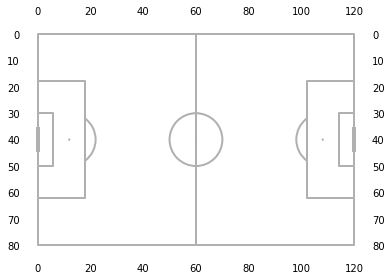

In [73]:
pitch = Pitch(label=True)
pitch.draw()
plt.gca().invert_yaxis()

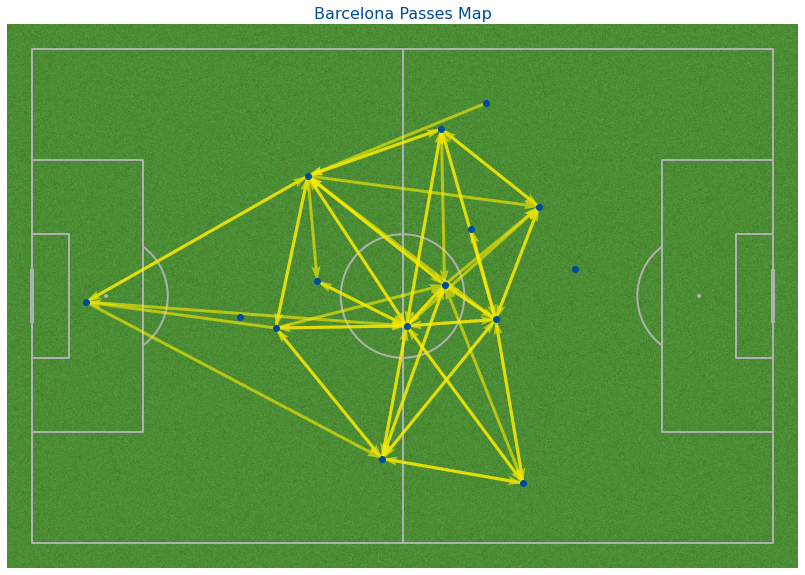

In [81]:
# draw football pitch Barca

fig, ax = plt.subplots(figsize = (23, 10))

pitch = Pitch(pitch_color='grass')

pitch.draw(ax=ax)
arrow = pitch.arrows(pass_between_bar['x']* 1.2, pass_between_bar['y'] * 0.8, 
                     pass_between_bar['x_end']* 1.2, pass_between_bar['y_end'] * 0.8, 
                     ax=ax, width = 3, alpha = 0.6, zorder = 1, color = '#FFEE00')
plt.scatter(average_loc_b['x']* 1.2, average_loc_b['y'] * 0.8, color = '#004C99')
plt.gca().invert_yaxis()
plt.title('Barcelona Passes Map', color ='#004C99', fontsize = 16)
plt.savefig('Barca passes map.png');

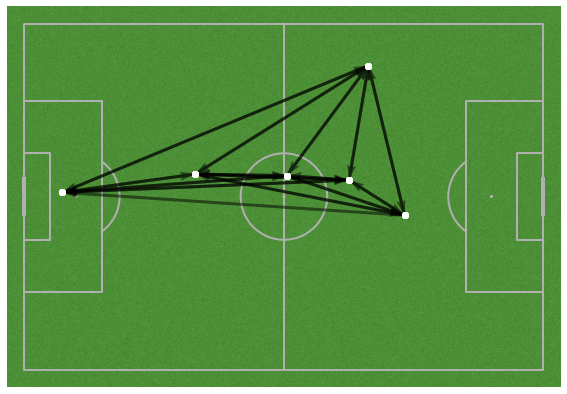

In [163]:
# draw football pitch vall

fig, ax = plt.subplots(figsize = (13, 7))
pitch = Pitch(pitch_color='grass')

pitch.draw(ax=ax)
arrow = pitch.arrows(pass_between_val['x']* 1.2, pass_between_val['y'] * 0.8, 
                     pass_between_val['x_end']* 1.2, pass_between_val['y_end'] * 0.8, 
                     ax=ax, width = 3, alpha = 0.5)
plt.scatter(pass_between_val['x']* 1.2, pass_between_val['y'] * 0.8, color = 'w');